# Pré-processamento dos dados das exportações do RN

<img height="200" src="https://share-eric.eu/fileadmin/_processed_/b/5/csm_dataheader_ec9ee966be.jpg" width="600"/>

# Carregando base de dados das exportações do RN

In [148]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_rn_continente = pd.read_csv(
    '../../../data/raw/V_EXPORTACAO_GERAL_1997-01_2024-12_CONTINENTE_EXCEL.csv')
dataset_exportacoes_rn_blocos_economicos = pd.read_csv(
    '../../../data/raw/V_EXPORTACAO_GERAL_1997-01_2024-12_BLOCOS_ECONOMICOS_EXCEL.csv')


# 1. Leitura e Inspeção Inicial

## 1.1 Verificando os tipos dos dados

In [149]:
from IPython.display import display
import pandas as pd

# Exibe o resultado
pd.DataFrame({
    'Tipos dos dados dataset continente': dataset_exportacoes_rn_continente.dtypes,
    'Tipos dos dados dataset blocos econômicos': dataset_exportacoes_rn_blocos_economicos.dtypes
})

,Tipos dos dados dataset continente,Tipos dos dados dataset blocos econômicos
Unnamed: 0,int64,int64
year,int64,int64
month,object,object
UF do Produto,object,object
Bloco Econômico,object,object
Países,object,object
Via,object,object
URF,object,object
Código NCM,int64,int64
Descrição NCM,object,object


## 1.2 Verificando dados ausentes

In [150]:
print(f"Dados ausentes no dataset por continentes? {dataset_exportacoes_rn_continente.isnull().any().any()}")
print(
    f"Dados ausentes no dataset por blocos econômicos? {dataset_exportacoes_rn_blocos_economicos.isnull().any().any()}")

Dados ausentes no dataset por continentes? False
Dados ausentes no dataset por blocos econômicos? False


## Não há dados faltantes

## 1.3 Verificando valores nulos

In [151]:
# Filtrando as transações onde "Valor US$ FOB" é igual a 0
transacoes_zero_fob_continentes = dataset_exportacoes_rn_continente[dataset_exportacoes_rn_continente['Valor US$ FOB'] == 0]
transacoes_zero_fob_blocos = dataset_exportacoes_rn_blocos_economicos[dataset_exportacoes_rn_blocos_economicos['Valor US$ FOB'] == 0]

print("Quantidade de transações nulas:")
print("Dataset continentes: ", len(transacoes_zero_fob_continentes))
print("Dataset blocos:", len(transacoes_zero_fob_blocos))


Quantidade de transações nulas:
Dataset continentes:  29
Dataset blocos: 17


## 1.4 Dropando linhas em que o valor fob é nulo

In [152]:
# Filtrando as transações onde "Valor US$ FOB" é igual a 0
df_exportacoes_rn_continente = dataset_exportacoes_rn_continente[dataset_exportacoes_rn_continente['Valor US$ FOB'] != 0]
df_exportacoes_rn_blocos = dataset_exportacoes_rn_blocos_economicos[dataset_exportacoes_rn_blocos_economicos['Valor US$ FOB'] != 0]

transacoes_zero_fob_continentes_drop = df_exportacoes_rn_continente[df_exportacoes_rn_continente['Valor US$ FOB'] == 0]
transacoes_zero_fob_blocos_drop = df_exportacoes_rn_blocos[df_exportacoes_rn_blocos['Valor US$ FOB'] == 0]

print("Quantidade de transações nulas após drop:")
print("Dataset continentes: ", len(transacoes_zero_fob_continentes_drop))
print("Dataset blocos:", len(transacoes_zero_fob_blocos_drop))

Quantidade de transações nulas após drop:
Dataset continentes:  0
Dataset blocos: 0


# 2. Correção e Conversão de Tipos dos Dados

## 2.1 Converter colunas para tipo adequado

In [153]:
df_exportacoes_rn_continente.head()

,Unnamed: 0,year,month,UF do Produto,Bloco Econômico,Países,Via,URF,Código NCM,Descrição NCM,...,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística
0,0,2024,09. Setembro,Rio Grande do Norte,América Central e Caribe,Bahamas,MARITIMA,0420154 - IRF NATAL,27101911,Querosenes de aviação,...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",V,Produtos minerais,METRO CUBICO,14906,11675,15
1,1,2024,09. Setembro,Rio Grande do Norte,América Central e Caribe,Costa Rica,MARITIMA,0817800 - PORTO DE SANTOS,52093900,Outros tecidos de algodão que contenham pelo m...,...,5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,XI,Matérias têxteis e suas obras,QUILOGRAMA LIQUIDO,11130,1294,1294
2,2,2024,09. Setembro,Rio Grande do Norte,América Central e Caribe,Costa Rica,MARITIMA,0917800 - PORTO DE PARANAGUA,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",...,1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,IV,"Produtos das indútrias alimentares; Bebidas, l...",QUILOGRAMA LIQUIDO,38824,22782,22782
3,3,2024,09. Setembro,Rio Grande do Norte,América Central e Caribe,El Salvador,MARITIMA,0420154 - IRF NATAL,27101911,Querosenes de aviação,...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",V,Produtos minerais,METRO CUBICO,1915,1482,2
4,4,2024,09. Setembro,Rio Grande do Norte,América Central e Caribe,El Salvador,MARITIMA,0517800 - ALF - SALVADOR,52092200,Tecidos de algodão que contenham pelo menos 85...,...,5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,XI,Matérias têxteis e suas obras,QUILOGRAMA LIQUIDO,58126,9825,9825


In [154]:
df_exportacoes_rn_blocos.head()

,Unnamed: 0,year,month,UF do Produto,Bloco Econômico,Países,Via,URF,Código NCM,Descrição NCM,...,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística
0,0,2024,09. Setembro,Rio Grande do Norte,Associação de Nações do Sudeste Asiático - ASEAN,Malásia,MARITIMA,0817800 - PORTO DE SANTOS,39159000,"Desperdícios, resíduos e aparas, de outros plá...",...,3915,"Desperdícios, resíduos e aparas, de plástico",39,Plásticos e suas obras,VII,Plásticos e suas obras; Borracha e suas obras,QUILOGRAMA LIQUIDO,29295,21000,21000
1,1,2024,09. Setembro,Rio Grande do Norte,Associação de Nações do Sudeste Asiático - ASEAN,Vietnã,AEREA,0420154 - IRF NATAL,12119090,"Outras plantas e partes, para perfumaria, medi...",...,1211,"Plantas, partes de plantas, sementes e frutos,...",12,"Sementes e frutos oleaginosos; grãos, sementes...",II,Produtos do reino vegetal,QUILOGRAMA LIQUIDO,52000,1300,1300
2,2,2024,09. Setembro,Rio Grande do Norte,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,39269090,Outras obras de plásticos,...,3926,Outras obras de plástico e obras de outras mat...,39,Plásticos e suas obras,VII,Plásticos e suas obras; Borracha e suas obras,QUILOGRAMA LIQUIDO,1924,125,125
3,3,2024,09. Setembro,Rio Grande do Norte,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,52092200,Tecidos de algodão que contenham pelo menos 85...,...,5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,XI,Matérias têxteis e suas obras,QUILOGRAMA LIQUIDO,5274,624,624
4,4,2024,09. Setembro,Rio Grande do Norte,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,63079090,Outros artefatos têxteis confeccionados,...,6307,"Outros artefactos confeccionados, incluídos os...",63,Outros artefatos têxteis confeccionados; sorti...,XI,Matérias têxteis e suas obras,QUILOGRAMA LIQUIDO,411,25,25


## 2.2 Juntar "Ano" e "Mês" em uma unica coluna "Data"

### 2.2.1 Transformando coluna "Mês" em dado numérico

In [155]:
dataset_exportacoes_rn_blocos_economicos['month'] = dataset_exportacoes_rn_blocos_economicos['month'].str.extract(
    r'(\d+)').astype(int)
dataset_exportacoes_rn_continente['month'] = dataset_exportacoes_rn_continente['month'].str.extract(r'(\d+)').astype(
    int)

In [156]:
# Renomeando temporariamente as colunas
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(
    columns={'Ano': 'year', 'Mês': 'month'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'Ano': 'year', 'Mês': 'month'})

# Criando a coluna 'Mês/Ano' como datetime
dataset_exportacoes_rn_blocos_economicos['Data'] = pd.to_datetime(
    dataset_exportacoes_rn_blocos_economicos[['year', 'month']].assign(day=1))
dataset_exportacoes_rn_continente['Data'] = pd.to_datetime(
    dataset_exportacoes_rn_continente[['year', 'month']].assign(day=1))

dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(
    columns={'year': 'Ano', 'month': 'Mês'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'year': 'Ano', 'month': 'Mês'})

# Dropa colunas Mês e Ano
# Blocos economicos
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Ano", axis=1)
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Mês", axis=1)

# Continentes
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Ano", axis=1)
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Mês", axis=1)

dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_continente.drop("Unnamed: 0", axis=1)
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Unnamed: 0", axis=1)

### 2.2.2 Dropando coluna UF do produto, todas as linhas são iguais

In [157]:
# Dropa colunas "UF do Produto"
# Blocos economicos
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("UF do Produto", axis=1)
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("UF do Produto", axis=1)

In [158]:
dataset_exportacoes_rn_continente.dtypes

Bloco Econômico                   object
Países                            object
Via                               object
URF                               object
Código NCM                         int64
Descrição NCM                     object
Código SH6                         int64
Descrição SH6                     object
Código SH4                         int64
Descrição SH4                     object
Código SH2                         int64
Descrição SH2                     object
Código Seção                      object
Descrição Seção                   object
Unidade estatística               object
Valor US$ FOB                      int64
Quilograma Líquido                 int64
Quantidade Estatística             int64
Data                      datetime64[ns]
dtype: object

## 2.3 Encoding das colunas categóricas

In [159]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Criação do LabelEncoder
encoder = LabelEncoder()

# Lista das colunas a serem transformadas
colunas_a_transformar = ['Bloco Econômico', 'Países', 'Via', 'URF', 'Descrição NCM', 'Descrição SH6', 'Descrição SH4',
                         'Descrição SH2', 'Código Seção', 'Descrição Seção', 'Unidade estatística',]

# Datasets encodeds

dataset_exportacoes_rn_continente_encoded = pd.DataFrame()
dataset_exportacoes_rn_blocos_economicos_encoded = pd.DataFrame()

# Aplicar LabelEncoder nas colunas selecionadas
for coluna in colunas_a_transformar:
    dataset_exportacoes_rn_continente_encoded[coluna] = encoder.fit_transform(dataset_exportacoes_rn_continente[coluna])
    dataset_exportacoes_rn_blocos_economicos_encoded[coluna] = encoder.fit_transform(dataset_exportacoes_rn_blocos_economicos[coluna])

dataset_exportacoes_rn_continente_encoded

,Bloco Econômico,Países,Via,URF,Descrição NCM,Descrição SH6,Descrição SH4,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística
0,0,8,4,44,1356,995,558,18,5,18,2
1,0,37,4,70,1170,961,510,2,10,6,8
2,0,37,4,80,188,917,452,6,3,16,8
3,0,46,4,44,1356,995,558,18,5,18,2
4,0,46,4,56,1464,1205,510,2,10,6,8
...,...,...,...,...,...,...,...,...,...,...,...
57130,6,161,4,52,471,429,452,6,3,16,8
57131,6,161,4,52,188,917,452,6,3,16,8
57132,6,161,4,52,1110,917,452,6,3,16,8
57133,7,75,4,23,213,207,111,28,2,2,8


# 3. Análise de outliers

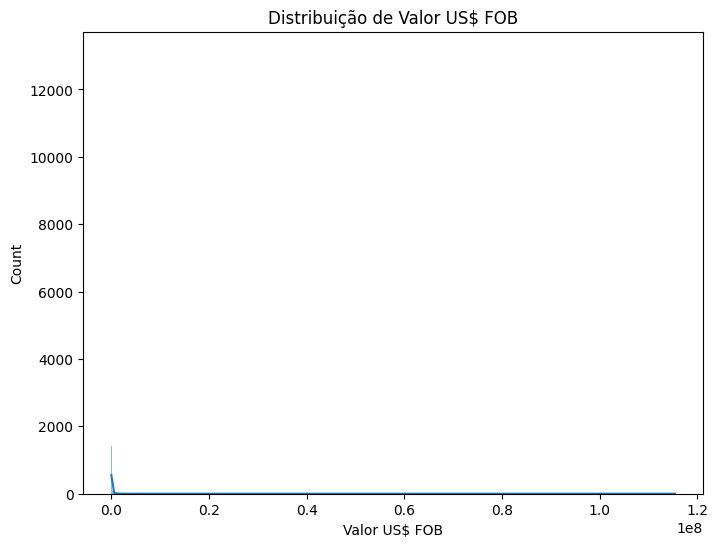

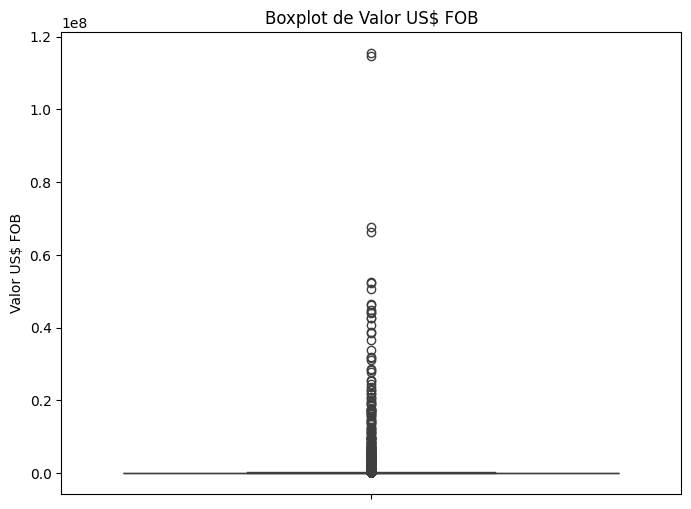


Estatísticas descritivas de Valor US$ FOB:
count    5.713500e+04
mean     1.633967e+05
std      1.271327e+06
min      0.000000e+00
25%      5.100000e+03
50%      2.364500e+04
75%      8.637450e+04
max      1.154291e+08
Name: Valor US$ FOB, dtype: float64

Outliers detectados em Valor US$ FOB:
        Bloco Econômico          Países       Via  \
17     América do Norte          Canadá  MARITIMA   
36     América do Norte  Estados Unidos     AEREA   
51     América do Norte  Estados Unidos  MARITIMA   
53     América do Norte  Estados Unidos  MARITIMA   
61     América do Norte  Estados Unidos  MARITIMA   
...                 ...             ...       ...   
57120            Europa        Portugal  MARITIMA   
57121            Europa     Reino Unido  MARITIMA   
57122            Europa     Reino Unido  MARITIMA   
57128            África         Nigéria  MARITIMA   
57129            África         Nigéria  MARITIMA   

                                                     URF  Código NCM

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002CC2A16B380> (for post_execute), with arguments args (),kwargs {}:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as colunas numéricas que você quer analisar
colunas_numericas = ['Valor US$ FOB', 'Quilograma Líquido']

# Análise visual
for coluna in colunas_numericas:
    # Histograma
    plt.figure(figsize=(8, 6))  # Ajustando o tamanho da figura
    sns.histplot(dataset_exportacoes_rn_continente[coluna], kde=True)
    plt.title(f'Distribuição de {coluna}')
    plt.show()

    # Boxplot (orientação vertical)
    plt.figure(figsize=(8, 6))  # Ajustando o tamanho da figura
    sns.boxplot(y=dataset_exportacoes_rn_continente[coluna])  # Mudança para orientação vertical
    plt.title(f'Boxplot de {coluna}')
    plt.show()

    # Estatísticas descritivas para identificar outliers
    print(f'\nEstatísticas descritivas de {coluna}:')
    print(dataset_exportacoes_rn_continente[coluna].describe())

    # Identificação de outliers (usando o método IQR)
    Q1 = dataset_exportacoes_rn_continente[coluna].quantile(0.25)
    Q3 = dataset_exportacoes_rn_continente[coluna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataset_exportacoes_rn_continente[(dataset_exportacoes_rn_continente[coluna] < (Q1 - 1.5 * IQR)) | (dataset_exportacoes_rn_continente[coluna] > (Q3 + 1.5 * IQR))]

    if not outliers.empty:
        print(f'\nOutliers detectados em {coluna}:')
        print(outliers)
    else:
        print(f'\nNenhum outlier detectado em {coluna}.')


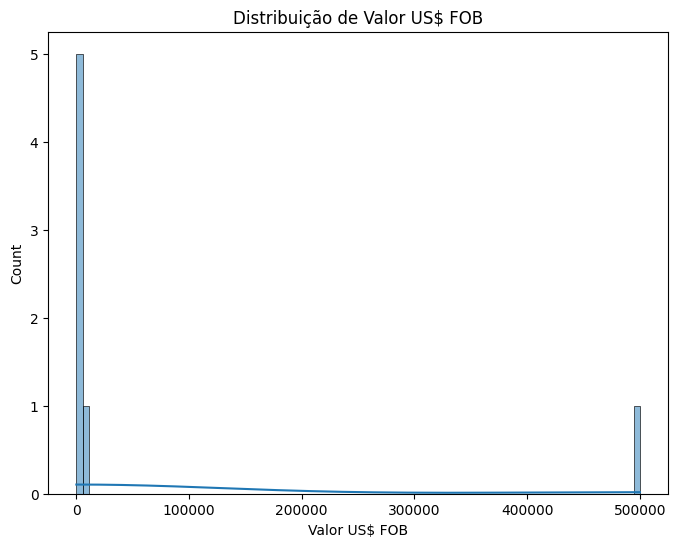

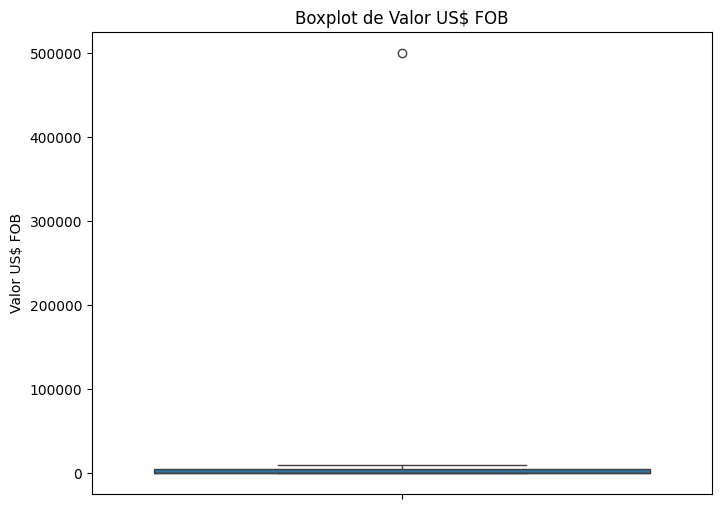


Estatísticas descritivas de Valor US$ FOB:
count         7.000000
mean      73107.142857
std      188276.650235
min         100.000000
25%         175.000000
50%         300.000000
75%        5500.000000
max      500000.000000
Name: Valor US$ FOB, dtype: float64

Outliers detectados em Valor US$ FOB:
   Valor US$ FOB  Quilograma Líquido
3         500000                5000

Linhas com outliers em Valor US$ FOB:
   Valor US$ FOB  Quilograma Líquido
3         500000                5000


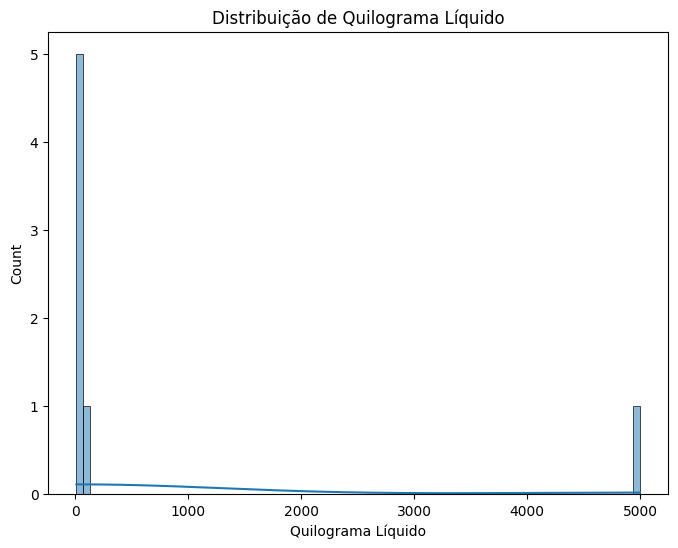

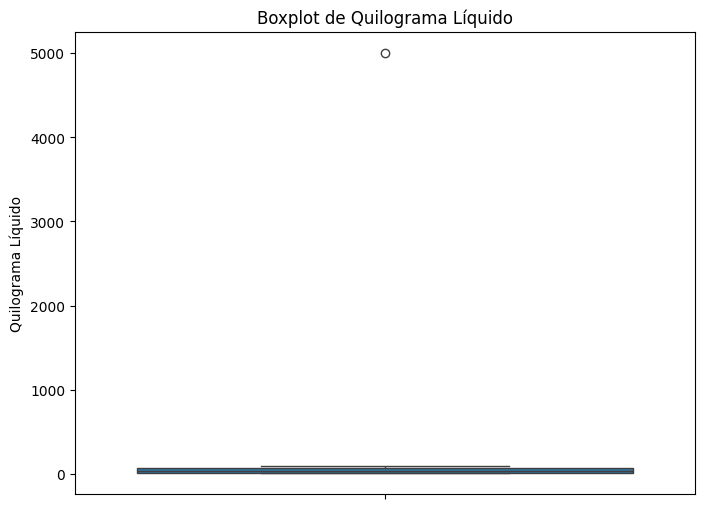


Estatísticas descritivas de Quilograma Líquido:
count       7.000000
mean      746.428571
std      1875.901371
min        10.000000
25%        17.500000
50%        30.000000
75%        75.000000
max      5000.000000
Name: Quilograma Líquido, dtype: float64

Outliers detectados em Quilograma Líquido:
   Valor US$ FOB  Quilograma Líquido
3         500000                5000

Linhas com outliers em Quilograma Líquido:
   Valor US$ FOB  Quilograma Líquido
3         500000                5000


In [127]:
# Definindo as colunas numéricas que você quer analisar
colunas_numericas = ['Valor US$ FOB', 'Quilograma Líquido']

# Análise visual e identificação de outliers
for coluna in colunas_numericas:
    # Histograma
    plt.figure(figsize=(8, 6))  # Ajustando o tamanho da figura
    sns.histplot(df[coluna], kde=True)
    plt.title(f'Distribuição de {coluna}')
    plt.show()

    # Boxplot (orientação vertical)
    plt.figure(figsize=(8, 6))  # Ajustando o tamanho da figura
    sns.boxplot(y=df[coluna])  # Mudança para orientação vertical
    plt.title(f'Boxplot de {coluna}')
    plt.show()

    # Estatísticas descritivas para identificar outliers
    print(f'\nEstatísticas descritivas de {coluna}:')
    print(df[coluna].describe())

    # Identificação de outliers (usando o método IQR)
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR))]

    if not outliers.empty:
        print(f'\nOutliers detectados em {coluna}:')
        print(outliers)

        # Filtrar as linhas que contêm outliers
        outliers_filtrados = df[(df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR))]
        print(f'\nLinhas com outliers em {coluna}:')
        print(outliers_filtrados)
    else:
        print(f'\nNenhum outlier detectado em {coluna}.')